# 1. El espacio muestral asociado a un experimento aleatorio

El espacio muestral $\Omega$ del experimento aleatorio de lanzar dos dados honestos, esta compuesto por todas las pearejas ordenadas $(i,j)$ tales que $1 \leq i,j \leq 6$

$$\Omega = \{ (i,j) \mid 1 \leq i,j \leq 6 \} $$
y sabemos que $\#\Omega = 6^2 = 36$

In [4]:
#usamos itertools
from itertools import product

In [6]:
Omega = set(product([1,2,3,4,5,6], repeat = 2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [10]:
card_Omega = len(Omega)
card_Omega

36

Sea $S_n$ el evento "La suma de los dados en $n$". Esto es: 
$$S_n=\{(i,j)\in\Omega:i+j=n\}.$$

In [14]:
def S(n):
    Sn = {(i,j) for i in range(1,7) for j in range(1,7) if i+j==n}
    return Sn

In [16]:
print(S(9))

{(6, 3), (4, 5), (5, 4), (3, 6)}


In [18]:
print(S(12))

{(6, 6)}


## 2. La variable aleatoria asociada a $S_n$

In [21]:
from fractions import Fraction

In [33]:
# Definir la funcion P(A)
# Es la probabilidad del evento A definida mediante la definición clásica

def P(A):
    P = Fraction(len(A), len(Omega))
    return P

In [27]:
# Vamos a definir un diccionario S
# (i,j) pares ordenados y los valores de su suma

S = {(i,j) : i+j for i,j in Omega} 

In [41]:
# Agrupación de combinaciones por suma

from collections import defaultdict

dS = defaultdict(set)

In [43]:
# Vamos a recorrer sobre los elementos en S

for i,j in S.items():
    
    dS[j].add(i)

In [45]:
list(dS.items()) 

[(7, {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)}),
 (4, {(1, 3), (2, 2), (3, 1)}),
 (9, {(3, 6), (4, 5), (5, 4), (6, 3)}),
 (10, {(4, 6), (5, 5), (6, 4)}),
 (6, {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)}),
 (8, {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)}),
 (11, {(5, 6), (6, 5)}),
 (3, {(1, 2), (2, 1)}),
 (5, {(1, 4), (2, 3), (3, 2), (4, 1)}),
 (2, {(1, 1)}),
 (12, {(6, 6)})]

In [49]:
# LeyS almacenar la probabilidad de casa posible suma,
# Usando la función P(A)
# En otras palabras "la función de densidad"
# A es el conjunto de pares que producden la suma i

leyS = {i : P(A) for i, A in dS.items() }
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

In [51]:
# Importamos la libreria Pandas

import pandas as pd

Recordemos que una variable aleatoria real $X$, es una función
$$X : \Omega \to \mathbb{R}$$

Sabemos que la función de densidad de una v.a. discreta $X$, se define como sigue:
$$ f_X(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{X} \\ 0, \quad \text{e.o.c} \end{cases} $$
donde $R_X$ es el rango de la v.a. $X$.

Para nuestro evento $S_n$, se tiene la siguiente variable aleatoria
$$ S : \Omega \to \{2,3,4,5,6,7,8,9,10,11,12\}$$

In [62]:
# Vamos a crear una serie 

ley_S = pd.Series(leyS)
ley_S.sort_index() #ordenar

2     1/36
3     1/18
4     1/12
5      1/9
6     5/36
7      1/6
8     5/36
9      1/9
10    1/12
11    1/18
12    1/36
dtype: object

In [ ]:
import numpy as np # Importar la liberia

In [68]:
# LeyS(i) devuelve la probabilidad de obtener la suma i, si está en el rango de posibles sumas

def leyS(i):
    if i in range(2,13):
        x = ley_S[i]
    else:
        x = 0 # si no está en el rango me devuelve cero
    return x

In [74]:
# Vamos a crear el rango de S

#creo una lista con los posibles valores
rango_S = [k for k in range(2,13)]

#Obtenemos la probabilidad de cada suma 
p_k = [float(leyS(k)) for k in rango_S]

In [76]:
# Creamos un DataFrame con:
# - los valores del rango_S
# - las probabilidades p_k
# Indexamos una etiqueta S_2,...,S_12

# zip() -> toma dos listas y las combina en pares ordenados
lS = pd.DataFrame(list(zip(rango_S, p_k)), index=[f"S_{i}" for i in range(2,13)], columns = ['rango','densidad'])
lS

,rango,densidad
S_2,2,0.027778
S_3,3,0.055556
S_4,4,0.083333
S_5,5,0.111111
S_6,6,0.138889
S_7,7,0.166667
S_8,8,0.138889
S_9,9,0.111111
S_10,10,0.083333
S_11,11,0.055556


<Axes: xlabel='rango'>

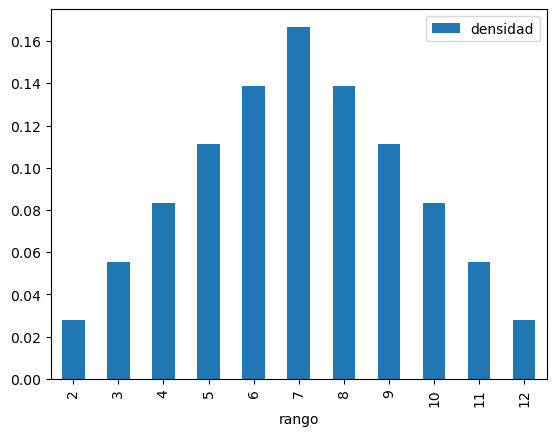

In [78]:
lS.plot.bar( x= 'rango', y = 'densidad')